In [2]:
import pandas as pd
import matplotlib.pyplot as plt


In [21]:
def read_classification_report(file_name:str):
    result = dict()
    with open(file_name, 'r') as f:
        lines = f.readlines()
        for line in lines[1:]:
            confusion_set, num_matches, num_sequences = line.strip().split(';')
            result[confusion_set] = (int(num_matches), int(num_sequences))
    return result

def calculate_false_alarm_rate(file_name):
    data = read_classification_report(file_name)
    FP = sum(value[0] for value in data.values())
    TN = sum(value[1] for value in data.values()) - FP
    return FP/(TN+FP)

def calculate_miss_rate(file_name):
    data = read_classification_report(file_name)
    TP = sum(value[0] for value in data.values())
    FN = sum(value[1] for value in data.values()) - TP
    return FN/(TP+FN)


# 10k data set

In [23]:
file_false_positives = 'output/report_false_positives.csv'
file_true_positives = 'output/report_true_positives.csv'

far = calculate_false_alarm_rate(file_false_positives)
mr = calculate_miss_rate(file_true_positives)

print(f"false alarm rate: {far:.3f}") #false alarm rate: 0.001
print(f"miss rate: {mr:.3f}") #miss rate: 0.005

false alarm rate: 0.001
miss rate: 0.005


# Balanced data set

In [24]:
file_false_positives = 'output/report_false_positives_balanced.csv'
file_true_positives = 'output/report_true_positives_balanced.csv'

far = calculate_false_alarm_rate(file_false_positives)
mr = calculate_miss_rate(file_true_positives)

print(f"false alarm rate: {far:.3f}") #false alarm rate: 0.001
print(f"miss rate: {mr:.3f}")

false alarm rate: 0.011
miss rate: 0.044


# Mu search (Balanced)

In [3]:
report_data = pd.read_csv('output/report_magnitude_search_balanced.csv', sep=';')
report_data.set_index('magnitude', inplace=True)
report_data['false-alarm rate'] = report_data['FP'] / (report_data['FP'] + report_data['TN']) #false-positive-rate
report_data['miss rate'] = report_data['FN'] / (report_data['FN'] + report_data['TP']) #1 - true-positive-rate
report_data

,TP,TN,FP,FN,total,false-alarm rate,miss rate
magnitude,,,,,,,
1,39242,15024,430,1158,55854,0.027825,0.028663
2,39124,15139,315,1276,55854,0.020383,0.031584
3,39036,15191,263,1364,55854,0.017018,0.033762
4,38954,15221,233,1446,55854,0.015077,0.035792
5,38887,15240,214,1513,55854,0.013848,0.037450
6,38823,15252,202,1577,55854,0.013071,0.039035
7,38761,15264,190,1639,55854,0.012295,0.040569
8,38708,15275,179,1692,55854,0.011583,0.041881
9,38668,15283,171,1732,55854,0.011065,0.042871


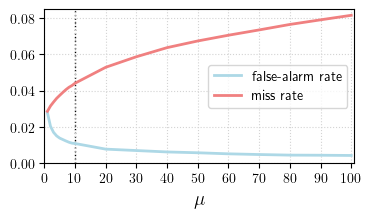

In [5]:
#report_data[['false-alarm rate','miss rate']].plot(xticks=list(range(0,101,10)), figsize=(4,2), xlabel='threshold factor $\mu$', grid=True, color=['lightblue', 'lightcoral'], linewidth=3)

y_1 = report_data['false-alarm rate']
y_2 = report_data['miss rate']
x = report_data.index

plt.rc('text', usetex=True)

fig, ax = plt.subplots(figsize=(4,2))
ax.set_xticks(list(range(0,101,10)))
#ax.set_yticks([0, 0.01, 0.02, 0.03, 0.04, 0.05, 0.06, 0.07, 0.08, 0.09, 0.1])
ax.grid(color='lightgray', linestyle='dotted')
ax.margins(x=0.0102, y=0)
ax.set_xlabel("$\mu$", fontsize=14)

plt.plot(x, y_1, label="false-alarm rate", color="lightblue", linewidth=2)
plt.plot(x, y_2, label="miss rate", color="lightcoral", linewidth=2)
plt.plot([10, 10],[0, 0.085] , zorder=1, color="black", linewidth=1, linestyle="dotted")
plt.legend()
plt.show()
